In [4]:
# Import necessary libraries
import pandas as pd  # For data handling
import matplotlib.pyplot as plt  # For visualizations

# Step 1: Load Datasets
stations_df = pd.read_csv("luxembourg_bike_stations.csv")
print("Bike Stations DataFrame:")
print(stations_df.head())

foursquare_df = pd.read_csv(r"C:\Users\Admin\Downloads\statistical modelling project\-Statistical-Modelling-Project\notebooks\foursquare_pois.csv")
print("\nFoursquare POIs DataFrame:")
print(foursquare_df.head())

yelp_df = pd.read_csv(r"C:\Users\Admin\Downloads\statistical modelling project\-Statistical-Modelling-Project\notebooks\yelp_pois.csv")
print("\nYelp POIs DataFrame:")
print(yelp_df.head())


# Step 2: Merge Datasets
# Merge Foursquare data with bike stations
merged_foursquare = pd.merge(
    stations_df,
    foursquare_df,
    on="station_name",
    how="inner"
)

# Merge Yelp data with bike stations
merged_yelp = pd.merge(
    stations_df,
    yelp_df,
    on="station_name",
    how="inner"
)

# Display the first few rows of the merged data
print("\nMerged Data (Foursquare):")
print(merged_foursquare.head())

print("\nMerged Data (Yelp):")
print(merged_yelp.head())


Bike Stations DataFrame:
                     station_name   latitude  longitude  available_bikes
0  #00126-SALLES DES FÊTES HOLZEM  49.615901   5.993194                9
1                    #00109-FOYER  49.569178   6.081750                2
2     #00053-LUDWIG VAN BEETHOVEN  49.590000   6.117200                2
3                #00013-GELLE FRA  49.609510   6.128503                4
4         #00116-CHARLY'S STATION  49.649823   6.225796                2

Foursquare POIs DataFrame:
                     station_name                poi_name  \
0  #00126-SALLES DES FÊTES HOLZEM       Restaurant Papaya   
1                    #00109-FOYER  Burger King Leudelange   
2                    #00109-FOYER      Il Punto Delizioso   
3                    #00109-FOYER                 El Gato   
4                    #00109-FOYER    Les Espaces Réunions   

               category   latitude  longitude  
0      Sushi Restaurant  49.616679   5.993284  
1  Fast Food Restaurant  49.567216   6.079689 

In [5]:
##Step 3: Explore the Data
# Check for missing data
print("\nMissing Data (Foursquare):")
print(merged_foursquare.isnull().sum())

print("\nMissing Data (Yelp):")
print(merged_yelp.isnull().sum())

# Summarize numerical columns
print("\nSummary Statistics (Foursquare):")
print(merged_foursquare.describe())

print("\nSummary Statistics (Yelp):")
print(merged_yelp.describe())


Missing Data (Foursquare):
station_name       0
latitude_x         0
longitude_x        0
available_bikes    0
poi_name           0
category           0
latitude_y         0
longitude_y        0
dtype: int64

Missing Data (Yelp):
station_name       0
latitude_x         0
longitude_x        0
available_bikes    0
poi_name           0
category           0
rating             0
review_count       0
latitude_y         0
longitude_y        0
dtype: int64

Summary Statistics (Foursquare):
        latitude_x  longitude_x  available_bikes   latitude_y  longitude_y
count  5492.000000  5492.000000       5492.00000  5492.000000  5492.000000
mean     49.612538     6.123189          5.98780    49.612793     6.123725
std       0.017321     0.036968          4.17946     0.016922     0.036745
min      49.565477     5.982361          0.00000    49.562150     5.969844
25%      49.601700     6.111800          3.00000    49.603229     6.115850
50%      49.612782     6.128503          5.00000    49.612146 

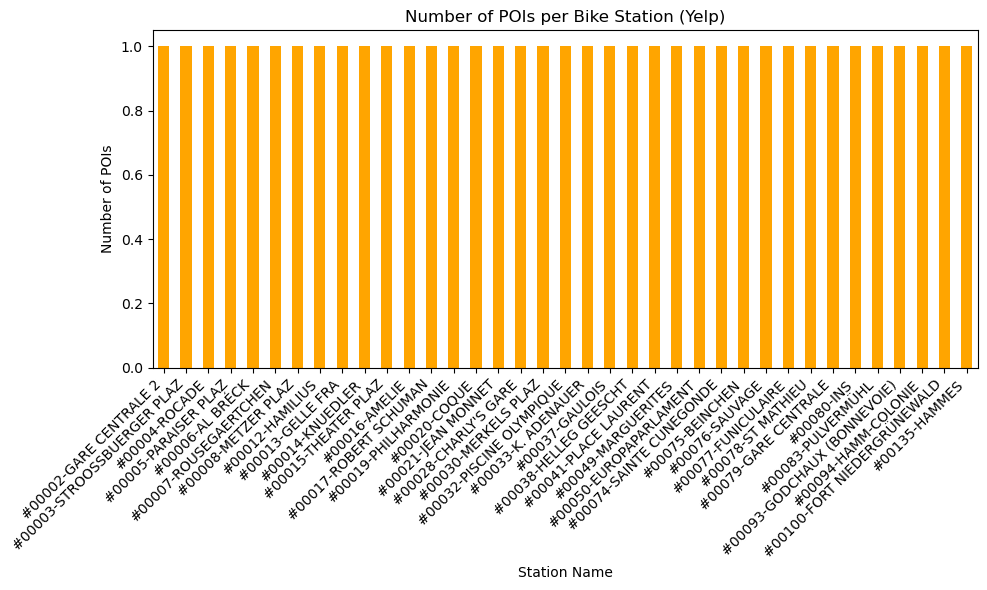

In [6]:
 ##Step 4: Visualization - Distribution of POIs (Yelp)
poi_count_yelp = merged_yelp.groupby("station_name")["poi_name"].count()

plt.figure(figsize=(10, 6))
poi_count_yelp.plot(kind="bar", color="orange")
plt.title("Number of POIs per Bike Station (Yelp)")
plt.xlabel("Station Name")
plt.ylabel("Number of POIs")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

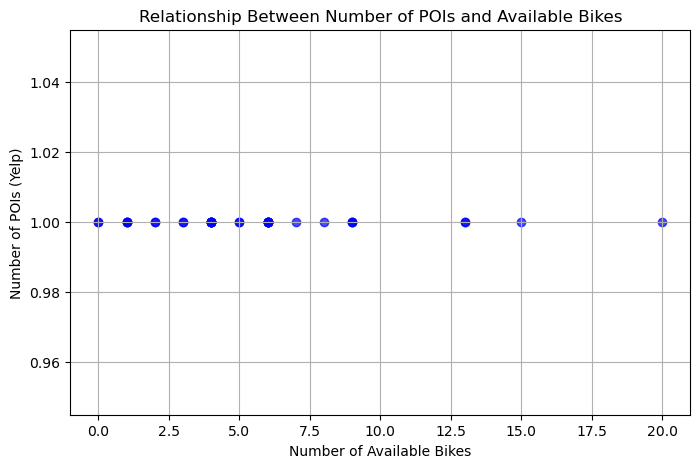

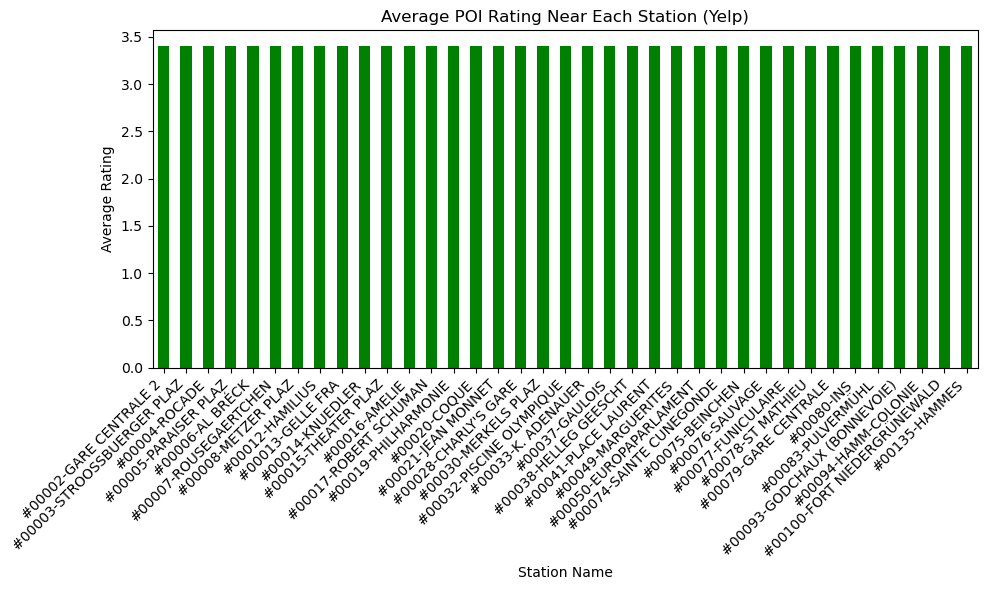

In [10]:
 ##Step 5: Analyze Relationships
# Scatter plot: Relationship between POI count and bike availability
plt.figure(figsize=(8, 5))
plt.scatter(
    merged_yelp["available_bikes"],
    merged_yelp.groupby("station_name")["poi_name"].count(),
    alpha=0.7,
    color="blue"
)
plt.title("Relationship Between Number of POIs and Available Bikes")
plt.xlabel("Number of Available Bikes")
plt.ylabel("Number of POIs (Yelp)")
plt.grid(True)
plt.show()

# Bar plot: Average rating of POIs near stations
average_ratings = merged_yelp.groupby("station_name")["rating"].mean()

plt.figure(figsize=(10, 6))
average_ratings.plot(kind="bar", color="green")
plt.title("Average POI Rating Near Each Station (Yelp)")
plt.xlabel("Station Name")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [11]:
# Step 6: Save Merged Data
merged_foursquare.to_csv("merged_foursquare_data.csv", index=False)
merged_yelp.to_csv("merged_yelp_data.csv", index=False)

print("\nMerged datasets saved as 'merged_foursquare_data.csv' and 'merged_yelp_data.csv'.")



Merged datasets saved as 'merged_foursquare_data.csv' and 'merged_yelp_data.csv'.


In [8]:
print(merged_yelp.head())


            station_name  latitude_x  longitude_x  available_bikes  \
0       #00013-GELLE FRA   49.609510     6.128503                4   
1     #00077-FUNICULAIRE   49.618823     6.136324                3   
2  #00038-HELLEG GEESCHT   49.607710     6.134560                4   
3          #00004-ROCADE   49.602989     6.136083                6   
4          #00016-AMELIE   49.613339     6.125794                3   

                      poi_name    category  rating  review_count  latitude_y  \
0  Brauerei - Big Beer Company  Brasseries     3.4             5   49.612585   
1  Brauerei - Big Beer Company  Brasseries     3.4             5   49.612585   
2  Brauerei - Big Beer Company  Brasseries     3.4             5   49.612585   
3  Brauerei - Big Beer Company  Brasseries     3.4             5   49.612585   
4  Brauerei - Big Beer Company  Brasseries     3.4             5   49.612585   

   longitude_y  
0     6.142349  
1     6.142349  
2     6.142349  
3     6.142349  
4     6.14234